# Calcula anomalia

In [1]:
import time

In [17]:
%%time
# importa bibliotecas
import salem
import glob
import xarray as xr
import numpy as np

# leitura do shapefile do Brasil
shapefile_brasil = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/brasil/BRAZIL.shp')

# lista dos arquivos
files = sorted(glob.glob(f'output/03_netcdf_focos_por_ano/focos_anual_brasil_*.nc')) # focos_anual_brasil_AQUA_2023.nc

# leitura dos arquivos por ano
focos_por_ano = xr.open_mfdataset(files, concat_dim='time', combine='nested')

# coloca "NaN" onde os "focos=0"
condicao = focos_por_ano['focos'][:,:,:] == 0
focos_por_ano['focos'][:,:,:] = np.where(condicao, np.nan, focos_por_ano['focos'][:,:,:])

# calculando a CLIMATOLOGIA: 2003-2023
climatologia = focos_por_ano.sel(time=slice('2003-01-01','2023-12-31')).mean("time")

# calculando a ANOMALIA
anomalia = focos_por_ano['focos'] - climatologia

# recorta o dado para região
anomalia = anomalia.salem.roi(shape=shapefile_brasil)
climatologia = climatologia.salem.roi(shape=shapefile_brasil)

CPU times: total: 938 ms
Wall time: 2.04 s


In [13]:
print(len(files))

22


In [15]:
files

['output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2003.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2004.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2005.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2006.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2007.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2008.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2009.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2010.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2011.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2012.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2013.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2014.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2015.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_brasil_AQUA_2016.nc',
 'output/03_netcdf_focos_por_ano\\focos_anual_br

In [16]:
focos_por_ano

<xarray.Dataset>
Dimensions:  (time: 22, lat: 210, lon: 210)
Coordinates:
  * lat      (lat) float64 7.0 6.8 6.6 6.4 6.2 ... -34.0 -34.2 -34.4 -34.6 -34.8
  * lon      (lon) float64 -75.0 -74.8 -74.6 -74.4 ... -33.8 -33.6 -33.4 -33.2
  * time     (time) datetime64[ns] 2003-12-01 2004-12-01 ... 2024-12-01
Data variables:
    focos    (time, lat, lon) float64 dask.array<chunksize=(1, 210, 210), meta=np.ndarray>

In [10]:
climatologia

<xarray.Dataset>
Dimensions:  (lat: 210, lon: 210)
Coordinates:
  * lat      (lat) float64 7.0 6.8 6.6 6.4 6.2 ... -34.0 -34.2 -34.4 -34.6 -34.8
  * lon      (lon) float64 -75.0 -74.8 -74.6 -74.4 ... -33.8 -33.6 -33.4 -33.2
Data variables:
    focos    (lat, lon) float64 dask.array<chunksize=(210, 210), meta=np.ndarray>
Attributes:
    pyproj_srs:  +proj=longlat +datum=WGS84 +no_defs

In [8]:
anomalia

<xarray.Dataset>
Dimensions:  (time: 22, lat: 210, lon: 210)
Coordinates:
  * lat      (lat) float64 7.0 6.8 6.6 6.4 6.2 ... -34.0 -34.2 -34.4 -34.6 -34.8
  * lon      (lon) float64 -75.0 -74.8 -74.6 -74.4 ... -33.8 -33.6 -33.4 -33.2
  * time     (time) datetime64[ns] 2003-12-01 2004-12-01 ... 2024-12-01
Data variables:
    focos    (time, lat, lon) float64 dask.array<chunksize=(1, 210, 210), meta=np.ndarray>
Attributes:
    pyproj_srs:  +proj=longlat +datum=WGS84 +no_defs

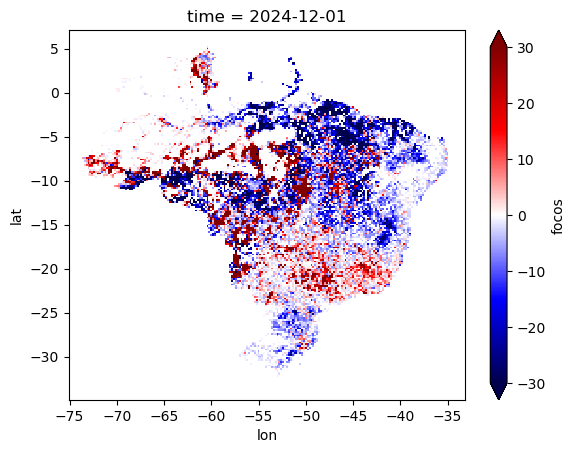

In [9]:
anomalia['focos'].loc['2024-12-01'].salem.roi(shape=shapefile_brasil).plot(vmin=-30, vmax=30, cmap='seismic')

# Plota figura

In [27]:
anomalia

<xarray.Dataset>
Dimensions:  (time: 22, lat: 210, lon: 210)
Coordinates:
  * lat      (lat) float64 7.0 6.8 6.6 6.4 6.2 ... -34.0 -34.2 -34.4 -34.6 -34.8
  * lon      (lon) float64 -75.0 -74.8 -74.6 -74.4 ... -33.8 -33.6 -33.4 -33.2
  * time     (time) datetime64[ns] 2003-12-01 2004-12-01 ... 2024-12-01
Data variables:
    focos    (time, lat, lon) float64 dask.array<chunksize=(1, 210, 210), meta=np.ndarray>
Attributes:
    pyproj_srs:  +proj=longlat +datum=WGS84 +no_defs

In [ ]:
%%time
# import bibliotecas
import proplot as pplt
import warnings
warnings.filterwarnings("ignore")

# Limites do Brasil
lonmin, lonmax, latmin, latmax = -75.0, -33.0, -35.0, 7.0

# cria a moldura da figura
fig, ax = pplt.subplots(figsize=(12, 12), 
                        nrows=5, ncols=5, 
                        tight=True, 
                        proj='pcarree', 
                        sharex=True, sharey=True)

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          labels=False, latlines=5, lonlines=10,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          suptitle=f'Anomaly',
          small='20px', large='25px',
          linewidth=0, grid=False)

# loop dos anos
for i, ano in enumerate(np.arange(2003, 2025)):

  # exibe na tela o ano que esta sendo processado
  print(f'Processando o ano: .... {i}')

  # plota figura
  map1 = ax[i].contourf(anomalia['lon'],
                        anomalia['lat'],
                        anomalia['focos'][i,:,:],
                        cmap='seismic',
                        vmin=-30, vmax=30,
                        levels=pplt.arange(-30, 30, 5),
                        extend='both')

  # plota titulo de cada figura
  ax[i].format(title=ano, labels = False, titleloc='c', titlecolor='grey')
  
  # plota contornos
  estados_brasil = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/estados_do_brasil/BR_UF_2019.shp')
  estados_brasil.plot(edgecolor='gray', facecolor='none', linewidth=0.5, alpha=1, ax=ax[i])

# plota barra de cores da figura
#fig.colorbar(map1, loc='b', label='mm/ano\nFonte: CHIRPS/Pixel: 5km', ticks=500, ticklabelsize=17, labelsize=17, space=0.5, length=0.60, width=0.3)

# salva figura
fig.savefig('output/04_figuras_anomalia/anomalia_anual_brasil.jpg', transparent=True, dpi=300, bbox_inches="tight")

Processando o ano: .... 0
Processando o ano: .... 1
Processando o ano: .... 2
Processando o ano: .... 3
Processando o ano: .... 4
Processando o ano: .... 5
Processando o ano: .... 6
Processando o ano: .... 7
Processando o ano: .... 8
Processando o ano: .... 9
Processando o ano: .... 10
Processando o ano: .... 11
